# BÀI 6: FEATURE SELECTION



Trong lĩnh vực máy học, việc lựa chọn đặc trưng là một phần quan trọng trong việc xây dựng mô hình. Điều này liên quan đến quá trình chọn ra một tập hợp con các đặc trưng quan trọng từ dữ liệu gốc. Mục tiêu của việc này là cải thiện hiệu suất của mô hình, giảm nguy cơ overfitting (quá khớp), và có thể làm tăng tốc độ huấn luyện mô hình.

Trong notebook này, chúng ta sẽ tìm hiểu về các kỹ thuật phổ biến để lựa chọn đặc trưng, và để minh họa các phương pháp này, chúng ta sẽ sử dụng bộ dữ liệu `breast cancer` từ thư viện `scikit-learn`. Bộ dữ liệu này thường được sử dụng để phân loại ung thư vú và là một ví dụ tốt để thực hành các kỹ thuật lựa chọn đặc trưng.

## 1. Chuẩn bị dữ liệu

Sau đây chúng ta sẽ sử dụng bộ dữ liệu `breast_cancer` có sẵn từ thư viện `sklearn` để tạo một dataframe. Bộ dữ liệu này thường được sử dụng để phân loại ung thư vú dựa trên các đặc trưng của mẫu .

Cụ thể, ta sẽ thực hiện từng bước sau:

1. Nhúng thư viện `sklearn.datasets` để tải bộ dữ liệu `breast_cancer`.

2. Tải bộ dữ liệu `breast_cancer` bằng hàm `load_breast_cancer()` và lưu kết quả vào biến `breast_cancer`.

3. Tạo một dataframe (`df`) từ dữ liệu của `breast_cancer`. DataFrame này sẽ chứa các đặc trưng (feature) của mẫu và cột 'target' để biểu thị nhãn (target) của mẫu, nghĩa là liệu mẫu đó là ung thư vú xấu (1) hay ung thư vú tốt (0).

4. Xuất ra màn hình năm hàng đầu của dataframe để hiển thị thông tin về dữ liệu.

Tổng quát, sau đây là đoạn mã chuẩn bị dữ liệu cho việc thực hành các phương pháp lựa chọn đặc trưng trên bộ dữ liệu ung thư vú.

In [1]:
# Sử dụng breast_cancer dataset có sẵn từ sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd

breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2. Pearson's correlation matrix

Tương quan Pearson là một phép đo đo lường mối quan hệ tuyến tính giữa hai biến liên tục. Giá trị của tương quan Pearson nằm trong khoảng từ -1 (khi có mối quan hệ tuyến tính hoàn toàn âm) đến 1 (khi có mối quan hệ tuyến tính hoàn toàn dương). Nếu tương quan là 0, đó cho thấy rằng không có mối quan hệ tuyến tính giữa hai biến. Chúng ta có thể sử dụng `tương quan Pearson` để xác định mức độ tương quan giữa các đặc trưng hoặc giữa một đặc trưng và biến mục tiêu.

Nói cách khác, `tương quan Pearson` cho phép chúng ta đo lường sự biến đổi của một biến khi biến kia thay đổi. Nếu tương quan gần 1, tức là khi một biến tăng thì biến kia cũng tăng theo một cách tuyến tính. Nếu tương quan gần -1, đó là một mối quan hệ tuyến tính đảo ngược, tức là khi một biến tăng thì biến kia giảm và ngược lại. Khi tương quan gần 0, không có mối tương quan tuyến tính giữa hai biến. `Tương quan Pearson` là một công cụ quan trọng để `phân tích sự tương quan giữa các biến` và có thể giúp chúng ta lựa chọn đặc trưng quan trọng trong việc xây dựng mô hình máy học.

**Bài tập**: Hãy viết hàm nhận vào dataframe và tải về dataframe là correlation matrix
từ phương thức `corr()` của class `pandas.DataFrame` với tham số `method = "pearson"`

In [3]:
def get_pearson_corr_matrix(df: pd.DataFrame) -> pd.DataFrame:
    # YOUR CODE HERE

    ### BEGIN SOLUTION
    return df.corr(method="pearson")
    ### END SOLUTION
    pass

In [4]:
# Tạo correlation matrix từ hàm đã viết
corr_matrix = get_pearson_corr_matrix(df)

In [5]:
# Kiểm tra với public tests
assert corr_matrix.__class__ is pd.DataFrame

Tiếp theo, ta sẽ trực quan hoá kết quả `correlation matrix` bằng cách sử dụng thư viện `matplotlib` và `seaborn`.

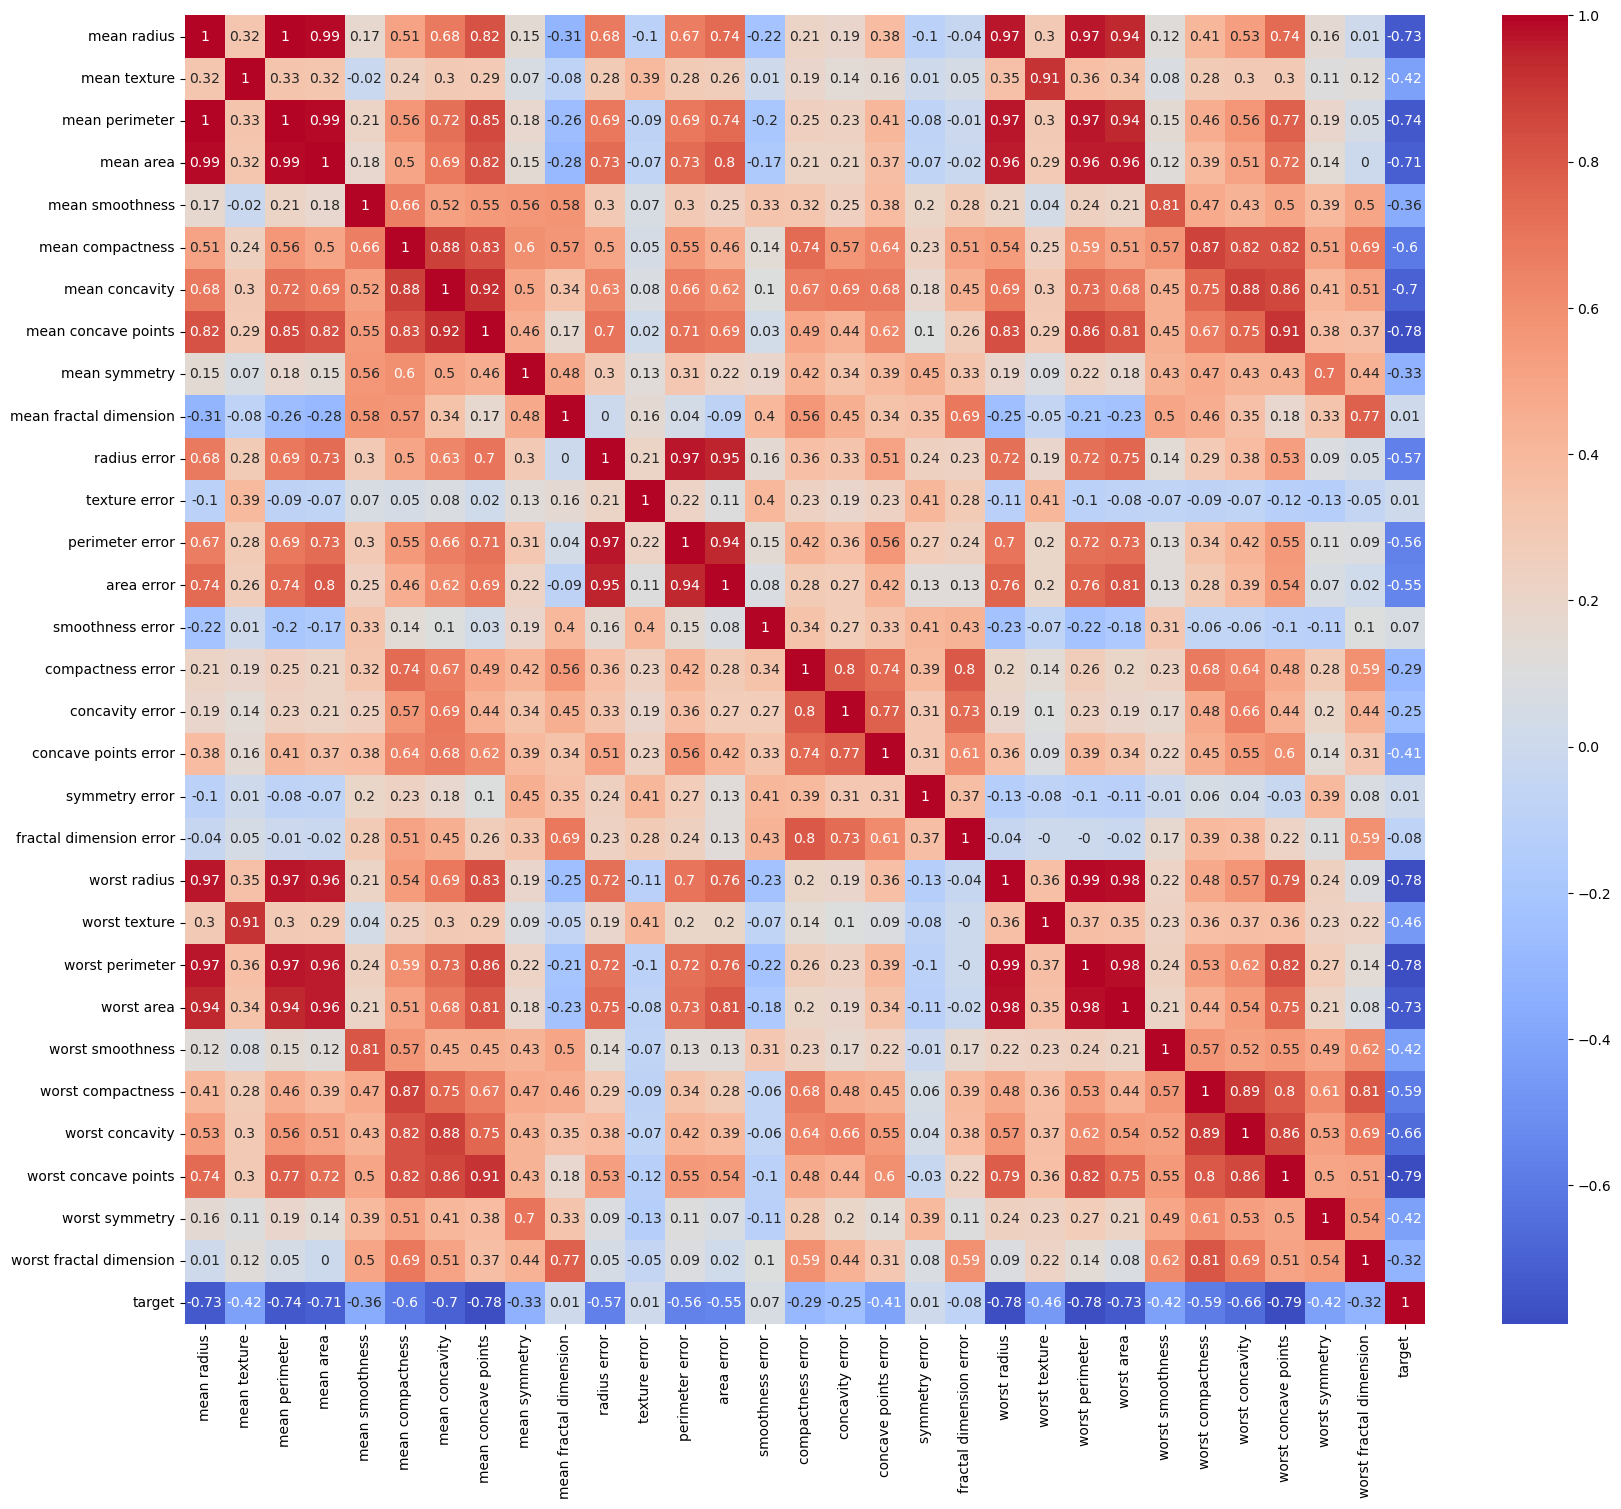

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 17))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

## 3. Linear Discriminant Analysis (LDA)

LDA là một kỹ thuật trong lĩnh vực xử lý dữ liệu và máy học. Mục tiêu chính của LDA là giảm số chiều của dữ liệu mà vẫn bảo toàn được thông tin quan trọng. Đặc biệt, LDA tập trung vào việc tối đa hóa sự phân tách (discrimination) giữa các lớp khác nhau trong dữ liệu, đặc biệt là trong bài toán phân loại.

Khi chúng ta nói về "tối đa hóa sự phân tách," điều này có nghĩa là LDA cố gắng tạo ra các hướng mà khi dữ liệu được chiếu lên các hướng đó, sự khác biệt giữa các lớp trở nên rõ rệt nhất. Điều này giúp cho việc phân loại dễ dàng hơn, vì các điểm dữ liệu thuộc các lớp khác nhau sẽ gần nhau hơn trong không gian mới sau khi chiếu.

LDA cũng quan tâm đến việc tối đa hóa tỷ lệ phương sai giữa các lớp, có nghĩa là nó cố gắng làm cho phương sai (biến động) giữa các điểm dữ liệu của các lớp khác nhau lớn hơn so với phương sai trong cùng một lớp. Điều này cũng đóng vai trò quan trọng trong việc tạo ra các hướng tối ưu để phân tách dữ liệu.

Tóm lại, LDA là một kỹ thuật quan trọng trong việc giảm chiều dữ liệu, đặc biệt trong bài toán phân loại, và nó hoạt động bằng cách xác định các hướng tối ưu để tối đa hóa sự phân tách giữa các lớp và tối đa hóa tỷ lệ phương sai giữa các lớp.

**Bài tập**: Hãy viết hàm nhận vào dataframe và tên cột chứa đặc trưng đích (target)
và trả về mảng chứa kết quả từ `LDA` sử dụng class `LinearDiscriminantAnalysis`
từ thư viện `sklearn`

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

def lda(df: pd.DataFrame, target_col: str) -> np.ndarray:
    # YOUR CODE HERE

    ### BEGIN SOLUTION
    data = df.drop(columns=[target_col])
    target = df[target_col]
    lda = LinearDiscriminantAnalysis()
    lda.fit(data, target)
    return lda.transform(data)
    ### END SOLUTION
    pass

In [8]:
# Tính toán kết quả từ hàm đã viết bên trên
lda_result = lda(df, "target")

In [9]:
# Kiểm tra với public tests
assert len(lda_result) == df.shape[0]

Chúng ta cũng sẽ trực quan hoá kết quả LDA sử dụng thư viện `matplotlib` và `seaborn`.

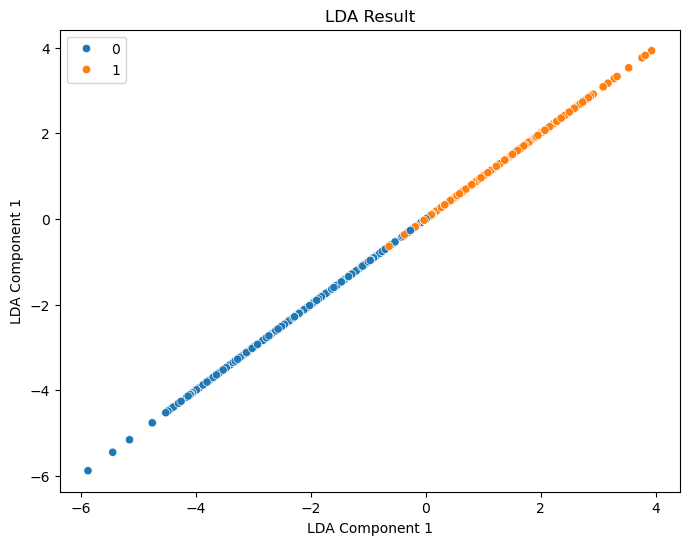

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=lda_result[:, 0], y=lda_result[:, 0], hue=df["target"])
plt.title('LDA Result')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 1')
plt.legend()
plt.show()

## 4. Loại bỏ những đặc trưng có độ tương đồng cao

Các đặc trưng trong dữ liệu có tương quan cao có thể gây ra một số vấn đề quan trọng trong quá trình xây dựng mô hình máy học. Một trong những vấn đề quan trọng đó là hiện tượng đa cộng tuyến (multicollinearity). Đa cộng tuyến xảy ra khi hai hoặc nhiều đặc trưng trong dữ liệu có mối quan hệ mạnh với nhau, nghĩa là chúng biến đổi cùng hướng hoặc ngược hướng khi dữ liệu thay đổi. Điều này có thể làm cho mô hình không ổn định và khó xác định đối với các đặc trưng riêng lẻ.

Một vấn đề khác là sự dư thừa trong dữ liệu. Khi hai đặc trưng tương quan cao, nó có nghĩa rằng thông tin từ cả hai đặc trưng có thể trùng lặp hoặc chỉ cung cấp thông tin tương tự cho mô hình. Điều này có thể dẫn đến việc dư thừa trong dữ liệu, khi mà một số đặc trưng không đóng góp thêm thông tin giá trị cho mô hình mà chỉ làm tăng độ phức tạp của nó.

Để giải quyết vấn đề này, tốt nhất là xác định và loại bỏ các đặc trưng có tương quan cao với nhau. Bằng cách này, chúng ta có thể giảm đa cộng tuyến và loại bỏ sự dư thừa trong dữ liệu, giúp mô hình hoạt động tốt hơn và dễ dàng giải thích. Việc lựa chọn các đặc trưng quan trọng và loại bỏ những đặc trưng không quan trọng có thể cải thiện hiệu suất của mô hình và giảm độ phức tạp của nó.

**Bài tập**: Hãy viết hàm nhận vào `dataframe` và `threshold` và trả về `dataframe`
đã được loại bỏ những đặc trưng sao cho không xuất hiện bất kỳ 2 đặc trưng nào
có giá trị tuyệt đối độ tương đồng vượt qua ngưỡng threshold.

**Lưu ý:** giữ lại đặc trưng ***target***

In [11]:
def drop_highly_correlated_features(df: pd.DataFrame, threshold: float) -> pd.DataFrame:
    # YOUR CODE HERE

    ### BEGIN SOLUTION
    new_df = df.drop(columns=["target"])
    target = df["target"]
    correlations = new_df.corr(method="pearson").abs()
    # correlations = new_df.corr().abs()
    # correlations = new_df.corr()

    # to_remove = []
    to_remove = set()
    for i in range(len(correlations)):
        for j in range(i + 1, len(correlations)):
            if correlations.iloc[i, j] > threshold:
                # to_remove.append(i)
                # break
                to_remove.add(j)
    to_remove = list(to_remove)

    new_df = new_df.drop(columns=df.columns[to_remove])
    new_df["target"] = target
    return new_df
    ### END SOLUTION
    pass

In [12]:
# Khởi tạo giá trị correlation_threshold là 0.7
correlation_threshold = 0.7
# Tiến hành loại bỏ những đặc trưng
df = drop_highly_correlated_features(df, correlation_threshold)

In [13]:
# Kiểm tra với public tests
assert df.shape[1] == 11
assert "target" in df.columns

Chúng ta sẽ trực quan hoá kết quả `correlation matrix` sau khi đã loại bỏ những đặc trưng có độ tương đồng cao.

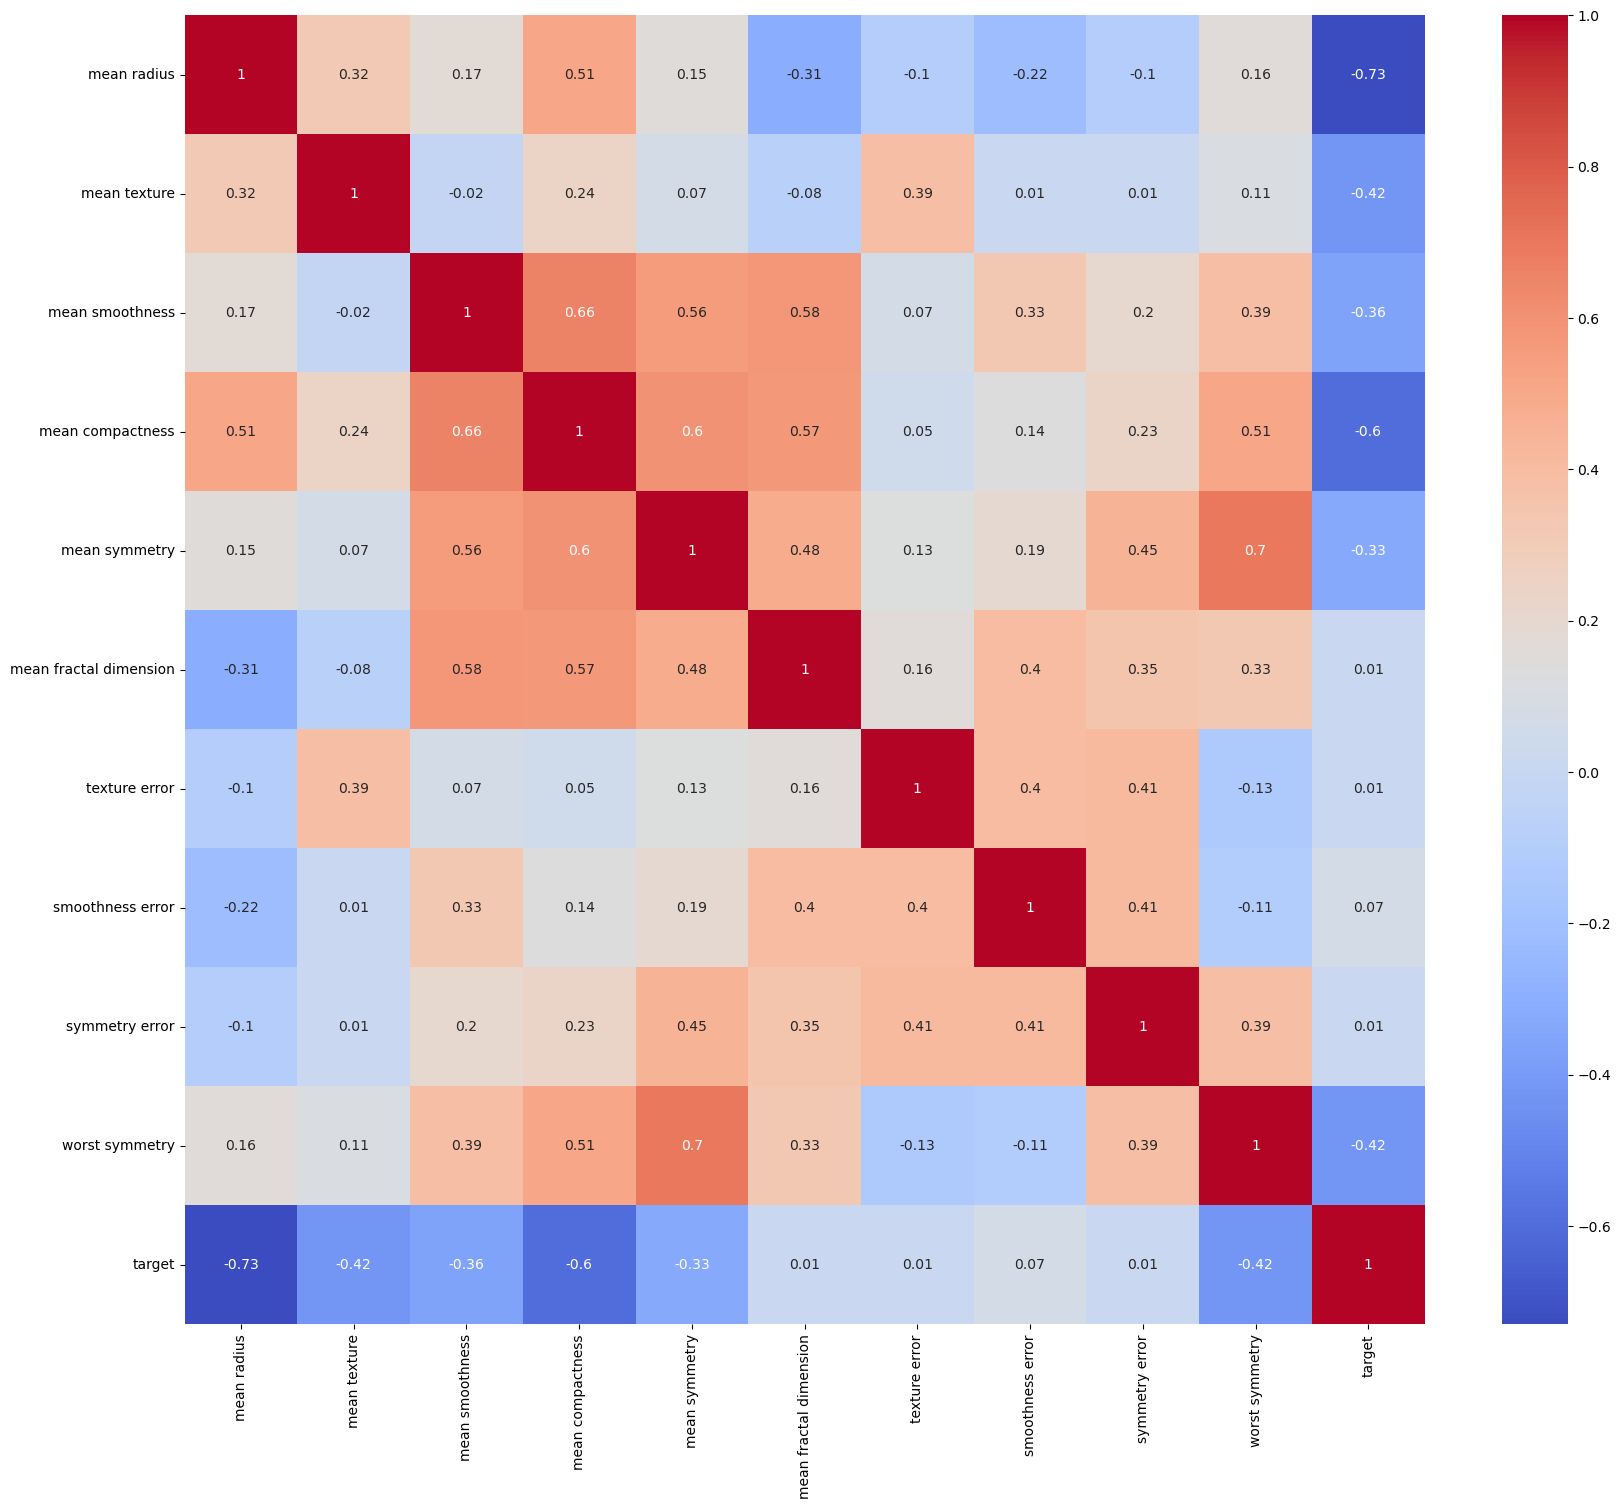

In [14]:
corr_matrix = get_pearson_corr_matrix(df)
plt.figure(figsize=(20, 17))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

## 5. Sử dụng mô hình Decision Tree đơn giản để dự đoán

Cây quyết định là một thuật toán phân loại đơn giản nhưng mạnh mẽ trong lĩnh vực máy học. Đây là cách mô hình hoạt động: Chúng ta xây dựng một cây quyết định bằng cách chia dữ liệu dựa trên các đặc trưng đã chọn và các quy tắc quyết định. Cây này có cấu trúc phân nhánh với các nút quyết định và các lá cây đại diện cho các phân lớp hoặc giá trị dự đoán.

Một trong những điểm mạnh của cây quyết định là khả năng cung cấp cái nhìn chi tiết về tính quan trọng của từng đặc trưng. Cụ thể, cây quyết định cho phép chúng ta biết được mức độ quyết định của mỗi đặc trưng trong quá trình phân loại. Các đặc trưng quan trọng sẽ nằm ở trên cận gốc của cây, trong khi những đặc trưng ít quan trọng hơn có thể nằm ở phía dưới.

Ngoài ra, cây quyết định cũng cho phép chúng ta hiểu tương tác giữa các đặc trưng. Một đặc trưng có thể được sử dụng để quyết định tại nút gốc của cây và sau đó được kết hợp với các đặc trưng khác ở các nút con. Điều này giúp chúng ta hiểu cách các đặc trưng tương tác với nhau trong quá trình phân loại.

Tóm lại, cây quyết định không chỉ là một mô hình phân loại hiệu quả mà còn cung cấp cái nhìn sâu hơn về tính quan trọng của các đặc trưng và cách chúng tương tác với nhau trong quá trình quyết định. Điều này có thể giúp chúng ta hiểu rõ hơn về dữ liệu và mô hình của mình, và có khả năng tối ưu hóa mô hình để đạt được hiệu suất tốt hơn.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("target", axis=1),
    df["target"],
    test_size=0.2,
    random_state=42
)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.868421052631579


# Kết luận
Việc lựa chọn đặc trưng hiệu quả cải thiện hiệu suất mô hình, tính giải thích và khả năng tổng quát hóa. Trong notebook này, chúng ta đã khám phá một số kỹ thuật, bao gồm tương quan Pearson, phân tích Đa biến LDA, loại bỏ các đặc trưng có tương quan cao và sử dụng cây quyết định đơn giản để phân loại. Áp dụng những kỹ thuật này vào bộ dữ liệu ung thư vú có thể giúp chúng ta hiểu rõ tính quan trọng của các đặc trưng khác nhau trong việc phân biệt giữa các khối u lành tính và ác tính.